In [5]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join as p_join

#ps = "C:/Users/Theresa/Documents/Uni/HZB/test_output/pointsource20000.csv"
path_to_output = "C:/Users/Theresa/Documents/Uni/HZB/RAy_reworked/rayreworked/build/bin/output.csv"
path_to_data = "C:/Users/Theresa/Documents/Uni/HZB/RAy_reworked/rayreworked/Tests/output/"

(1992, 9)
5.374170933897373
1.8023103186421991
11000.0
0.00048545620232621
0.0001660243739348
0.9999998683840828
1.0
-5.532943734500416 1.8036103834331931


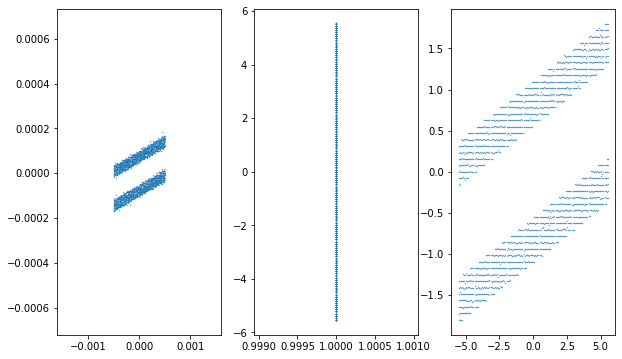

In [6]:
data = pd.read_csv(path_to_output, sep=';',header=0)
#data = pd.read_csv(p_join(path_to_data,"testFile_randomUniform.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data[data['Weight']==1]
print(filtered.shape)
i = 1
print(filtered['Xloc'].values[i])
print(filtered['Yloc'].values[i])
print(filtered['Zloc'].values[i])

print(filtered['Xdir'].values[i])
print(filtered['Ydir'].values[i])
print(filtered['Zdir'].values[i])

print(filtered['Weight'].values[i])

print(min(filtered['Xloc']), (max(np.abs(filtered['Yloc']))))
#print(np.unique(filtered['Weight'], return_counts=True)[:20])
#print(filtered['Weight'][:20])
#print(filtered['Energy'][:20])

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)


(9511, 9)
1.9143829113774635
33.925747535143636
473.714363386822
0.00402362944240756
0.08592292410387532
0.9962936622901652
1.0


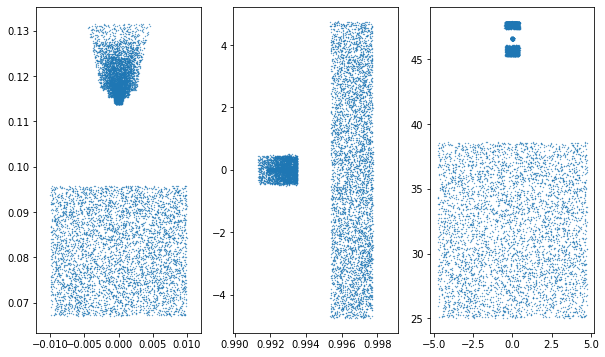

In [5]:
data = pd.read_csv(path_to_output, sep=';',header=0)
#data = pd.read_csv(p_join(path_to_data,"testFile_randomUniform.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data[data['Weight']==1]
print(filtered.shape)
i = 1
print(filtered['Xloc'].values[i])
print(filtered['Yloc'].values[i])
print(filtered['Zloc'].values[i])

print(filtered['Xdir'].values[i])
print(filtered['Ydir'].values[i])
print(filtered['Zdir'].values[i])

print(filtered['Weight'].values[i])

#print(min(filtered['Energy']), (max(filtered['Energy'])))
#print(np.unique(filtered['Weight'], return_counts=True)[:20])
#print(filtered['Weight'][:20])
#print(filtered['Energy'][:20])

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)


(28,)


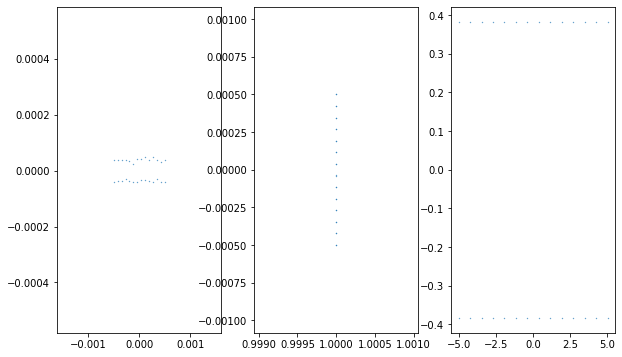

In [42]:
slit = "C:/Users/Theresa/Documents/Uni/HZB/test_output/"
slit = p_join(slit, 'Slit-RawRaysBeam.csv')
slit= pd.read_csv(slit, sep=';',header=0)

x = slit['Slit_DX'].values.astype(float)
y = slit['Slit_DY'].values.astype(float)
z = slit['Slit_DZ'].values.astype(float)


ox = slit['Slit_OX'].values.astype(float)
oy = slit['Slit_OY'].values.astype(float)
oz = slit['Slit_OZ'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,x, s=0.1)
ax[2].scatter(ox,oy, s=0.1)

# spec1-first_rzp4mm

In [122]:
minus_first_rzp4 = "C:/Users/Theresa/Documents/Uni/HZB/test_output/spec1-first_rzp4mm/"
rzp_minus_first_rzp4_path = p_join(minus_first_rzp4, 'Reflection Zoneplate-RawRaysBeam.csv')
rzp_minus_first_rzp4= pd.read_csv(rzp_minus_first_rzp4_path, sep=';',header=0)

ip_minus_first_rzp4_path = p_join(minus_first_rzp4, 'CCD 350-450-RawRaysBeam.csv')
ip_minus_first_rzp4 = pd.read_csv(ip_minus_first_rzp4_path, sep=';',header=0)

## RZP#

(9202,)


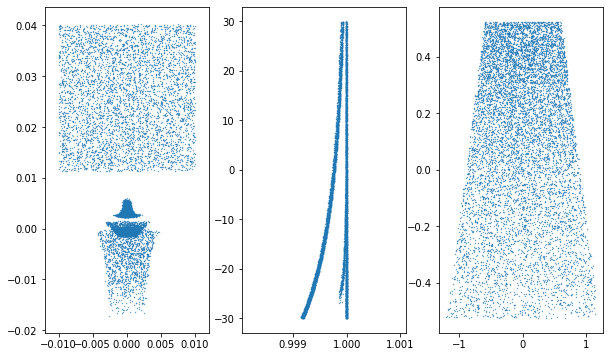

In [123]:
x = rzp_minus_first_rzp4['Reflection Zoneplate_DX'].values.astype(float)
y = rzp_minus_first_rzp4['Reflection Zoneplate_DY'].values.astype(float)
z = rzp_minus_first_rzp4['Reflection Zoneplate_DZ'].values.astype(float)


ox = rzp_minus_first_rzp4['Reflection Zoneplate_OX'].values.astype(float)
oy = rzp_minus_first_rzp4['Reflection Zoneplate_OY'].values.astype(float)
oz = rzp_minus_first_rzp4['Reflection Zoneplate_OZ'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,oz, s=0.1)
ax[2].scatter(ox,oy, s=0.1)

(9277, 9)


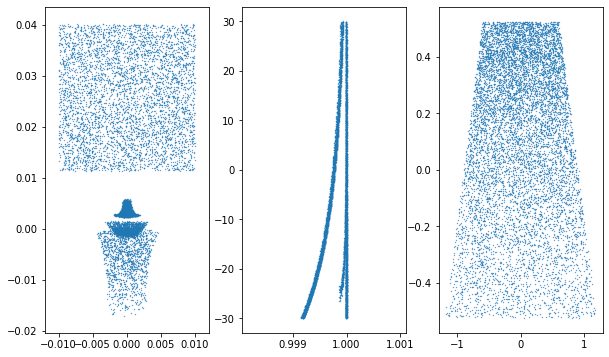

In [124]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_rzp.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']==1]
print(filtered.shape)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)

## Image Plane

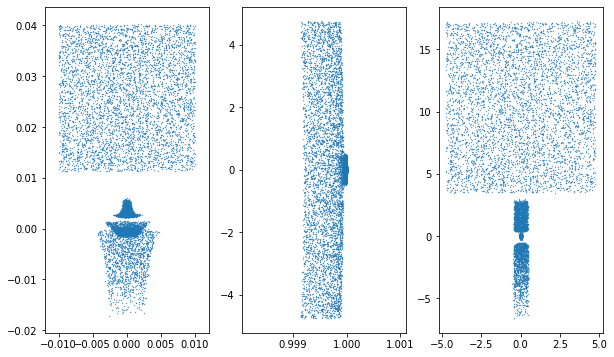

In [125]:
x = ip_minus_first_rzp4['CCD 350-450_DX'].values.astype(float)
y = ip_minus_first_rzp4['CCD 350-450_DY'].values.astype(float)
z = ip_minus_first_rzp4['CCD 350-450_DZ'].values.astype(float)


ox = ip_minus_first_rzp4['CCD 350-450_OX'].values.astype(float)
oy = ip_minus_first_rzp4['CCD 350-450_OY'].values.astype(float)
oz = ip_minus_first_rzp4['CCD 350-450_OZ'].values.astype(float)
assert(np.all(oz == 385))
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,ox, s=0.1)
ax[2].scatter(ox,oy, s=0.1)

(9277, 9)


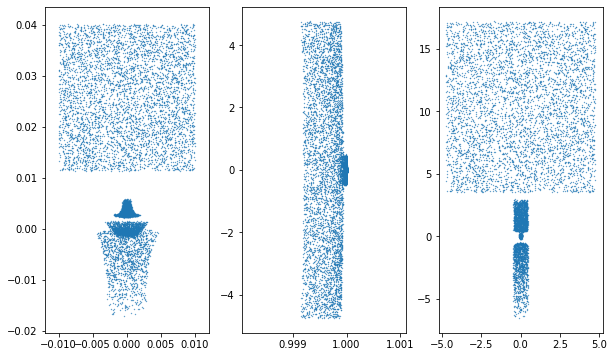

In [126]:
data_ip = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_rzp_ip.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_ip[data_ip['Weight']==1]
print(filtered.shape)

assert(np.all(filtered['Zloc'] == 0))
ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)

# spec1+first_rzp4mm

In [127]:
plus_first_rzp4 = "C:/Users/Theresa/Documents/Uni/HZB/test_output/spec1+first_rzp4mm/"
rzp_plus_first_rzp4_path = p_join(plus_first_rzp4, 'Reflection Zoneplate-RawRaysBeam.csv')
rzp_plus_first_rzp4 = pd.read_csv(rzp_plus_first_rzp4_path, sep=';',header=0)

ip_plus_first_rzp4_path = p_join(plus_first_rzp4, 'ImagePlaneBundle-RawRaysBeam.csv')
ip_plus_first_rzp4 = pd.read_csv(ip_plus_first_rzp4_path, sep=';',header=0)

## RZP

(9678,)


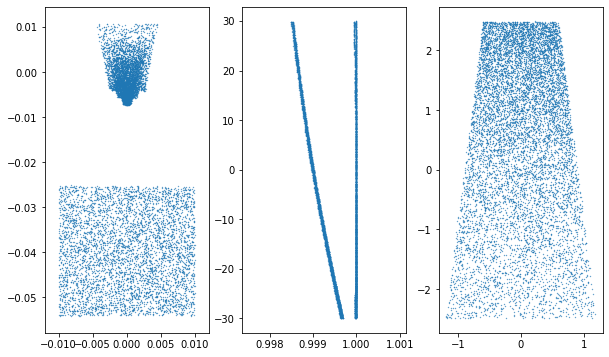

In [128]:
x = rzp_plus_first_rzp4['Reflection Zoneplate_DX'].values.astype(float)
y = rzp_plus_first_rzp4['Reflection Zoneplate_DY'].values.astype(float)
z = rzp_plus_first_rzp4['Reflection Zoneplate_DZ'].values.astype(float)


ox = rzp_plus_first_rzp4['Reflection Zoneplate_OX'].values.astype(float)
oy = rzp_plus_first_rzp4['Reflection Zoneplate_OY'].values.astype(float)
oz = rzp_plus_first_rzp4['Reflection Zoneplate_OZ'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,oz, s=0.1)
ax[2].scatter(ox,oy, s=0.1)

(9511, 9)


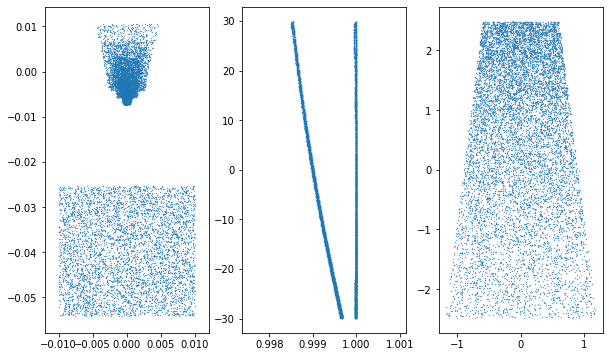

In [129]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_plus_rzp.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']==1]
print(filtered.shape)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)

## IMAGE PLANE

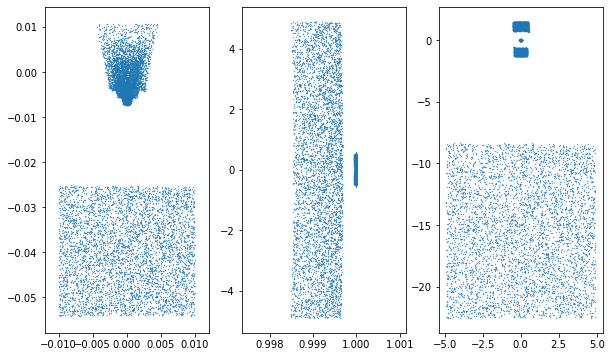

In [130]:
x = ip_plus_first_rzp4['ImagePlaneBundle_DX'].values.astype(float)
y = ip_plus_first_rzp4['ImagePlaneBundle_DY'].values.astype(float)
z = ip_plus_first_rzp4['ImagePlaneBundle_DZ'].values.astype(float)


ox = ip_plus_first_rzp4['ImagePlaneBundle_OX'].values.astype(float)
oy = ip_plus_first_rzp4['ImagePlaneBundle_OY'].values.astype(float)
oz = ip_plus_first_rzp4['ImagePlaneBundle_OZ'].values.astype(float)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,ox, s=0.1)
ax[2].scatter(ox,oy, s=0.1)

(9511, 9)


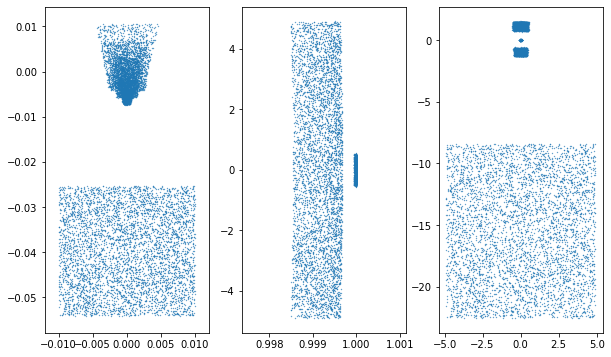

In [131]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_plus_rzp_ip.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']==1]
print(filtered.shape)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)

# spec1-first_rzp02

In [111]:
minus_first_rzp2 = "C:/Users/Theresa/Documents/Uni/HZB/test_output/spec1-first_rzp02/"
rzp_minus_first_rzp2_path = p_join(minus_first_rzp2, 'Reflection Zoneplate-RawRaysBeam.csv')
rzp_minus_first_rzp2= pd.read_csv(rzp_minus_first_rzp2_path, sep=';',header=0)

ip_minus_first_rzp2_path = p_join(minus_first_rzp2, 'CCD 350-450-RawRaysBeam.csv')
ip_minus_first_rzp2 = pd.read_csv(ip_minus_first_rzp2_path, sep=';',header=0)

## rzp

(9386,)


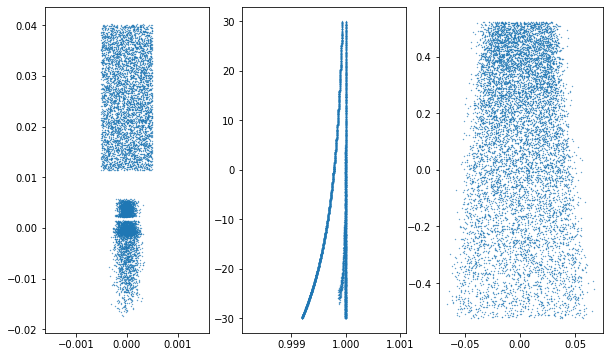

In [112]:
x = rzp_minus_first_rzp2['Reflection Zoneplate_DX'].values.astype(float)
y = rzp_minus_first_rzp2['Reflection Zoneplate_DY'].values.astype(float)
z = rzp_minus_first_rzp2['Reflection Zoneplate_DZ'].values.astype(float)


ox = rzp_minus_first_rzp2['Reflection Zoneplate_OX'].values.astype(float)
oy = rzp_minus_first_rzp2['Reflection Zoneplate_OY'].values.astype(float)
oz = rzp_minus_first_rzp2['Reflection Zoneplate_OZ'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,oz, s=0.1)
ax[2].scatter(ox,oy, s=0.1)

(9299, 9)


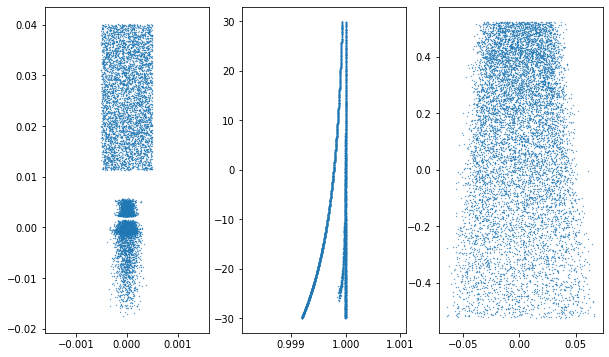

In [113]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_minus_rzp2.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']==1]
print(filtered.shape)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)

## image plane

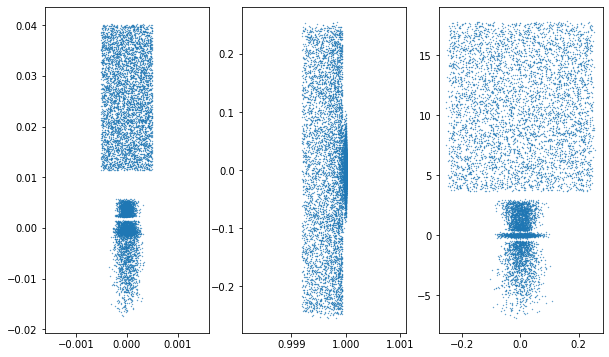

In [114]:
x = ip_minus_first_rzp2['CCD 350-450_DX'].values.astype(float)
y = ip_minus_first_rzp2['CCD 350-450_DY'].values.astype(float)
z = ip_minus_first_rzp2['CCD 350-450_DZ'].values.astype(float)


ox = ip_minus_first_rzp2['CCD 350-450_OX'].values.astype(float)
oy = ip_minus_first_rzp2['CCD 350-450_OY'].values.astype(float)
oz = ip_minus_first_rzp2['CCD 350-450_OZ'].values.astype(float)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].scatter(x,y, s=0.1)
ax[1].scatter(z,ox, s=0.1)
ax[2].scatter(ox,oy, s=0.1)

(9299, 9)


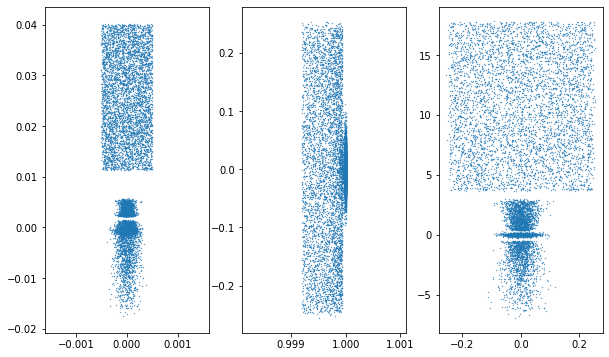

In [115]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_spec1_first_minus_rzp_ip2.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
filtered = data_rzp[data_rzp['Weight']==1]
print(filtered.shape)

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=0.1)
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], s=0.1)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=0.1)